## Regresión Lineal Simple: Mínimos Cuadrados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
sns.set_style('whitegrid')

En esta sesión vamos a crear un modelo que nos permita predecir el grado de felicidad de las personas a partir de su nivel de ingresos. Decidimos que sea un modelo de regresión lineal y además como sólo tiene una feature (el nivel de ingresos) será un modelo de regresión simple.


### El Problema

Se ha hecho una encuesta a 20 personas, preguntándoles por sus ingresos anuales en miles de euros y su nivel de felicidad en una escala del 0 al 10.   
Los resultados obtenidos se guardan en las listas `x` (ingresos) e `y` (felicidad)

```Python
x = [25.2, 15.6, 26, 24, 39.2, 17.6, 3.6, 24, 10, 8.8, 35.2, 22.8, 31.6, 6, 11.2, 5.2, 22.4, 20.4, 31.2, 19.6]
y = [10, 5, 9, 8, 10, 8, 1, 9, 3, 3, 10, 5, 10, 2, 4, 4, 9, 6, 10, 7]
```

Obtener un modelo de regresión lineal, predecir la felicidad de alguien que gane 20000€


### Modelado

In [1]:
import numpy as np

In [2]:
x = np.array([25.2, 15.6, 26, 24, 39.2, 17.6, 3.6, 24, 10, 8.8, 35.2, 22.8, 31.6, 6, 11.2, 5.2, 22.4, 20.4, 31.2, 19.6])
y = np.array([10, 5, 9, 8, 10, 8, 1, 9, 3, 3, 10, 5, 10, 2, 4, 4, 9, 6, 10, 7])

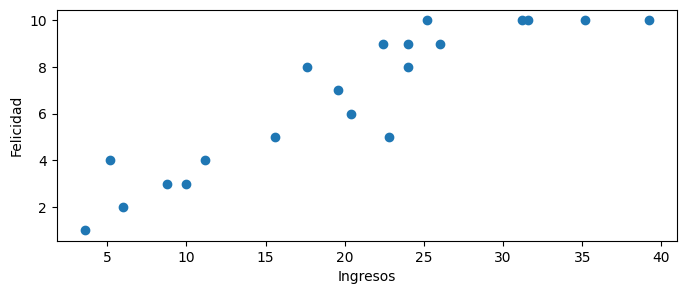

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,3))
ax = plt.axes()
ax.scatter(x,y)
ax.set_xlabel('Ingresos')
ax.set_ylabel('Felicidad');

Buscamos la recta $h(x)=w_0+w_1x$ que mejor ajuste los puntos, aplicando mínimos cuadrados. Para ello vamos paso a paso:

1. Creamos una matriz denominada con los puntos de nuestras features: 

$$X=\begin{bmatrix} 1 & x_0 \\ 1 & x_1 \\ \vdots & \vdots \\ 1 & x_n \end{bmatrix}$$

In [5]:
X = np.array([np.ones(len(x)),
              np.array(x)]).transpose()

print(X.shape)
X

(20, 2)


array([[ 1. , 25.2],
       [ 1. , 15.6],
       [ 1. , 26. ],
       [ 1. , 24. ],
       [ 1. , 39.2],
       [ 1. , 17.6],
       [ 1. ,  3.6],
       [ 1. , 24. ],
       [ 1. , 10. ],
       [ 1. ,  8.8],
       [ 1. , 35.2],
       [ 1. , 22.8],
       [ 1. , 31.6],
       [ 1. ,  6. ],
       [ 1. , 11.2],
       [ 1. ,  5.2],
       [ 1. , 22.4],
       [ 1. , 20.4],
       [ 1. , 31.2],
       [ 1. , 19.6]])

2. Creamos el vector de targets, con las medidas de felicidad:

$$y=\begin{bmatrix} y_0 \\ y_1 \\ \vdots \\ y_n\end{bmatrix}$$

In [7]:
y

array([10,  5,  9,  8, 10,  8,  1,  9,  3,  3, 10,  5, 10,  2,  4,  4,  9,
        6, 10,  7])

3. Resolvemos la ecuación matricial para obtener los coeficientes óptimos de la recta, los parámetros, que minimizan el MSE (recuerda que esa es nuestra función de pérdida para la regresión lineal):

  $$w = (X^TX)^{-1}X^Ty$$

Usando nuestro querido numpy, ahora algo oxidado:

In [6]:
w = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(y)


Comprobamos que la recta se ajusta a los puntos llamando a la siguiente función

In [8]:
def plot_all(w0,w1):

    plt.figure(figsize=(8, 4))
    ax = plt.axes()
    ax.scatter(x, y)
    ax.set_ylim([0,12])
    ax.set_xlim([0,45])
    ax.set_xlabel('Ingresos')
    ax.set_ylabel('Felicidad')
    e = np.linspace(0,45,len(x))
    z = w0+w1*e

    plt.plot(e, z, '-r', label='h(x)='+str(round(w0,2))+' + '+ str(round(w1,2))+'x')
    plt.legend(loc='upper left')
    plt.show()

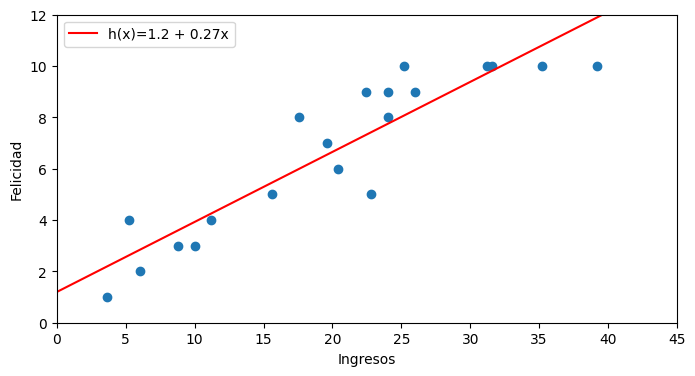

In [9]:
plot_all(w[0],w[1])

Finalmente, ¿cuál sería el nivel de felicidad de los que ganan 20.000€?

In [11]:
w[0] + w[1]*20

6.65545543038788

Y la evaluación del modelo (evaluación de train, ya que ni tenemos set de validación ni de test):

In [12]:
from sklearn.metrics import mean_squared_error

predictions = [ (w[0] + w[1] * x_i) for x_i in x]
len(predictions), len(y)

mean_squared_error(y,predictions,squared= False)

1.2079416155655123

Nos equivocamos en media en un 1.2 puntos. ¿Es eso bueno o malo? Es error de train y además no tenemos a quien preguntar... Aplicar entonces nuestro mejor criterio.

## Regresión Lineal Múltiple: Gradiente Descendente (Sklearn)

Queremos predecir los precios de una serie de casas, a partir de las siguientes variables:

- Avg. Area Income: Renta media de los residentes de la ciudad donde está la casa
- Avg. Area House Age: media de antigüedad de las casas de esa ciudad
- Avg. Area Number of Rooms: Número medio de habitaciones en las casas de esa ciudad
- Avg Area Number of Bedrooms: Número medio de dormitorios en las casas de la ciudad
- Area Population: Población de la ciudad
- Price: Precio de la casa (variable objetivo o variable target)
- Address: Dirección

In [18]:
USA_Housing = pd.read_csv('./data/USA_Housing.csv')
USA_Housing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


Exploremos el dataset:

In [19]:
USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


Son todas numéricas. 

In [20]:
USA_Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## EDA: Exploratory Data Analysis

### Variable target/objetivo: El Precio

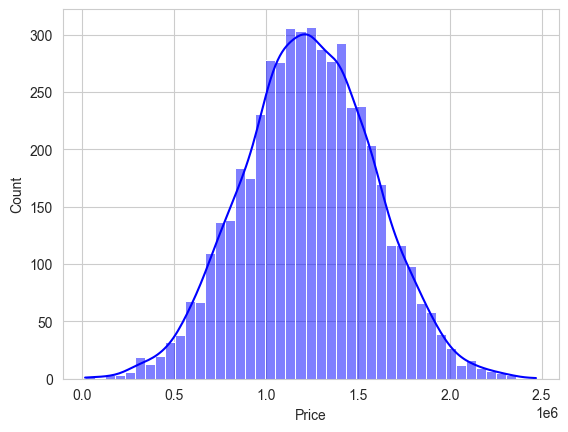

In [21]:
sns.histplot(USA_Housing['Price'], color='Blue', kde = True)
plt.show()

Tiene una distribución en forma de campana de Gauss, una distribución normal, y por tanto eso es una buena señal para aplicar regresión lineal.

### Multivariante 

Vamos a analizar las correlaciones de las numéricas entre sí, pero en especial con la variable Target:

In [22]:
USA_Housing.corr(numeric_only= True)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


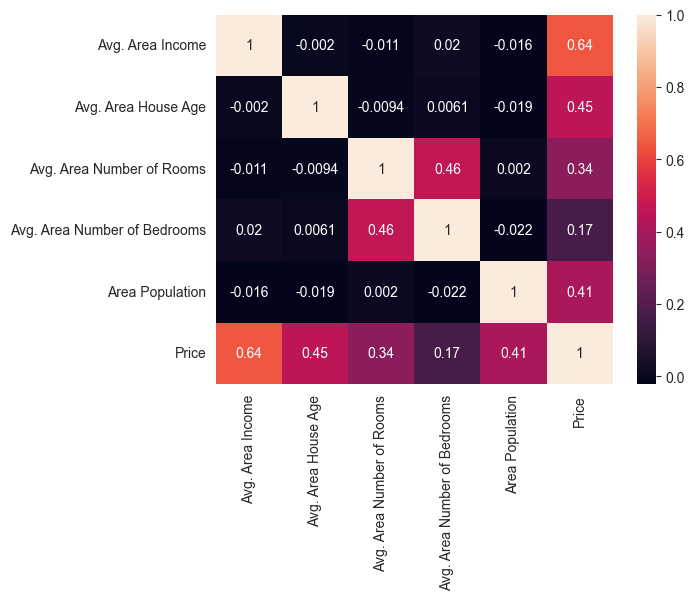

In [23]:
sns.heatmap(USA_Housing.corr(numeric_only = True),annot=True);


Deberíamos esperar que la variable que más influya sea el income del area (Avg. Area Income), como nos pasó con el modelo de ejemplo en la unidad de familiarización del sprint anterior.

## Entrenar un modelo de Regresión Lineal

En primer lugar, dividimos en train y test

In [24]:
USA_Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [25]:
# Feautures
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

# Target
y = USA_Housing['Price']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 5)
(4000, 5)
(1000, 5)
(4000,)
(1000,)


Y ya sí que tienes que ir tomando nota de cómo lo creamos a partir de `sklearn`:

In [30]:
from sklearn.linear_model import LinearRegression

# Creamos un objeto
lm = LinearRegression()

### Entrenamos  

Entrenar es básicamente obtener el valor de los parámetros (en este caso de regresión lineal también les llamaremos pesos) a partir de los datos de train. En este caso mediante optimización con gradiente descendente del error cuadrático medio (para que se te quede la terminología). Ese entrenamiento es lo que esconde el método `fit` (ojo el método fit por dentro hará otras cosas en otro tipo de modelos, sólo que Sklearn tiene la gracia de mantener la sintáxis independientmente del tipo de algoritmo y modelo)

In [31]:
# Entrenamos con los datos de train
lm.fit(X_train, y_train)

LinearRegression()

### Interpretación de los pesos

Recuerda que el modelo por dentro es como una "función" del tipo:


$$y = w_0 + w_1x_1 + w_2x_2 + ...$$

Veamos el parámetro $w_0$, también conocido como intercept y que nos da el valor para el caso de que los valores de todas las features sea 0:

In [32]:
lm.intercept_

-2635072.900933357

Y ahora los coeficientes (pesos o parámetros):

In [33]:
lm.coef_

array([2.16522058e+01, 1.64666481e+05, 1.19624012e+05, 2.44037761e+03,
       1.52703134e+01])

Vistos como un dataframe para interpretarlos mejor:

In [34]:
coef_df = pd.DataFrame(lm.coef_, X.columns, 
                      columns=['Coefficient'])
coef_df

,Coefficient
Avg. Area Income,21.652206
Avg. Area House Age,164666.480722
Avg. Area Number of Rooms,119624.012232
Avg. Area Number of Bedrooms,2440.377611
Area Population,15.270313


Interpretación de los coeficientes

Manteniendo fijos el resto de coeficientes:
- Un incremento de 1 unidad en **Avg. Area Income** equivale a un incremento de **21.64 dólares**  
- Un incremento de 1 unidad en **Avg. Area House Age** equivale a un incremento de **164,666 dólares**
- Un incremento de 1 unidad en **Avg. Area Number of Rooms** equivale a un incremento de **119,624 dólares**
- Un incremento de 1 unidad en **Avg. Area Number of Bedrooms** equivale a un incremento de **2,440  dólares**
- Un incremento de 1 unidad en **Area Population** equivale a un incremento de **15.27 dólares**

En definitiva nuestro modelo de regresión implementa la siguiente función:

$Precio = 	21.652206 \times \text{Avg. Area Income}+ 
164666.480722 \times \text{Avg. Area House Age} + 
119624.012232  \times \text{Avg. Area Number of Rooms}	+
2440.377611 \times \text{Avg. Area Number of Bedrooms}	+
15.270313 \times \text{Area Population}$

## Predicciones de nuestro modelo

Primero probemos a ver que precio asignaría a una casas en un área de ingresos medios de 100000 dolares, 20 años de antigüedad media, 8 habitaciones de media, 8 dormitorios de media y población media 100000 habitantes:

In [35]:
new_home = np.array([[100000, 20, 8, 8, 100000]])
lm.predict(new_home)

c:\Users\lucas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([5327023.75160817])

A partir de las predicciones sobre el conjunto de test, vamos a construir una gráfica que compare valores reales y valores predichos:

In [36]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
4711,77267.656264,3.939501,8.342808,6.09,22487.712072
2313,75967.135085,5.939370,6.111658,2.32,38897.091584
3214,81013.615294,7.149797,7.239105,5.44,45472.049451
2732,86762.882864,6.530193,5.106962,2.09,47724.581355


In [37]:
predictions = lm.predict(X_test)
predictions

array([1308587.92699759, 1237037.22949434, 1243429.34030681,
       1228900.2136037 , 1063320.9071083 , 1544058.05034861,
       1094774.70493019,  833284.72339225,  788412.85578719,
       1469714.86615709,  671728.43662062, 1606818.21977961,
       1004166.61331065, 1796798.9759592 , 1288566.96221026,
       1087782.93301076, 1423072.37492533, 1078178.68169677,
        802286.03537898,  930761.0369571 , 1134829.86477822,
        916398.42023144, 1489972.69335433, 1284580.15538816,
       1582071.35322737, 1132519.15991992, 1089888.39644517,
        974510.51872155,  924057.96820648, 1740759.72092282,
       1286481.59512311, 1621289.95171608, 1435264.2016172 ,
       1234014.77924477, 1485434.57300368, 1718335.00753702,
       1538953.74882858,  777106.64791791, 1765201.5224362 ,
       1175972.14199818, 1553707.94323485,  897703.67505179,
       1371049.80326609,  845281.72310359, 1201022.89803887,
       1133285.98450866, 1363128.14557346, 1449814.08768277,
       1574363.90467358,

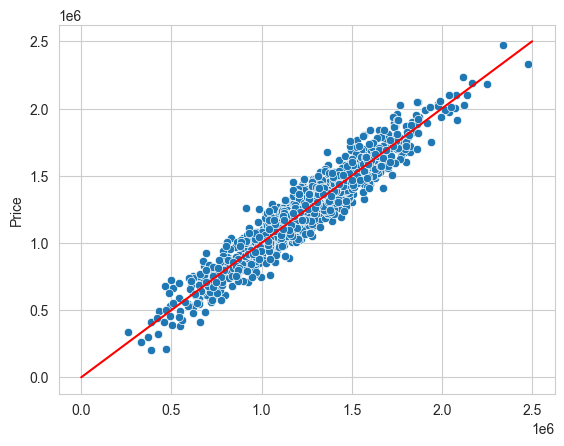

In [38]:
sns.scatterplot(x=predictions,y=y_test);
plt.plot([0,2.5e6],[0,2.5e6],'red')
plt.show()

No parece un mal modelo, pero para poder evaluarlo correctamente usemos las métricas de error, comparando train error con test error


### Evaluación a partir de las Métricas de error

- **MAE** (Mean Absolute Error): es el error medio (la más fácil de entender)
- **MSE** (Mean Squared Error): es más popular que el MAE ya que penaliza errores grandes
- **RMSE** (Root Mean Squared Error): es todavía más popular que el MSE porque está en las mismas unidades que la variable objetivo $y$
- **$R^2$** (Coeficiente de determinación): proporción de la varianza total de la variable objetivo explicada por la regresión

In [ ]:
from sklearn import metrics

### Train error

In [40]:
pred_train = lm.predict(X_train)
print('MAE train', metrics.mean_absolute_error(y_train, pred_train))
print('MSE train', metrics.mean_squared_error(y_train, pred_train))
print('RMSE train', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))
print('R2 train', lm.score(X_train,y_train))

MAE train 81509.39331244404
MSE train 10256318867.482723
RMSE train 101273.48551068401
R2 train 0.9179787435623722


### Test Error

In [41]:
print('MAE test', metrics.mean_absolute_error(y_test, predictions))
print('MSE test', metrics.mean_squared_error(y_test, predictions))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 test', lm.score(X_test,y_test))

MAE test 80879.09723489822
MSE test 10089009300.894522
RMSE test 100444.06055558746
R2 test 0.9179971706834288


## Importancia de variables 

Recordemos los coeficientes:

In [43]:
coef_df.sort_values('Coefficient', ascending=False)

,Coefficient
Avg. Area House Age,164666.480722
Avg. Area Number of Rooms,119624.012232
Avg. Area Number of Bedrooms,2440.377611
Avg. Area Income,21.652206
Area Population,15.270313


Una habitación extra incrementa el precio (y) en 2440 dólares, y un dolar extra en area income 
incrementa el precio en 21 dólares. Esto es el significado de los coeficientes, pero no quiere decir
que el número de habitaciones sea más importante/relevante que el area income  

Para conocer la importancia de variables tenemos que **estandarizar** los datos antes de entrenar el modelo

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

In [47]:
X_train_scaled

array([[-0.19049241, -0.12817719, -0.13160635,  0.12038585, -0.82761782],
       [-1.38876401,  0.43080443,  0.80028487, -0.55648895,  1.15829878],
       [-0.35012392,  0.46680752,  1.70375078,  0.03067955, -0.31904298],
       ...,
       [-0.22335061,  0.53809182, -0.36489661, -0.68697084,  0.11908894],
       [-0.92417067,  1.43077434,  2.26846315,  0.2753331 ,  1.39018355],
       [-0.69357335, -0.07762332,  0.89219611,  1.67801341, -0.00681852]])

In [48]:
lm_scaled = LinearRegression()
lm_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [49]:
feat_coef = pd.DataFrame(lm_scaled.coef_,
                        X_train.columns, 
                        columns=['importance_standarized']).sort_values('importance_standarized',
                                                                       ascending=False)
feat_coef

,importance_standarized
Avg. Area Income,231741.876652
Avg. Area House Age,163580.776566
Area Population,152235.900097
Avg. Area Number of Rooms,120724.771387
Avg. Area Number of Bedrooms,2992.449135


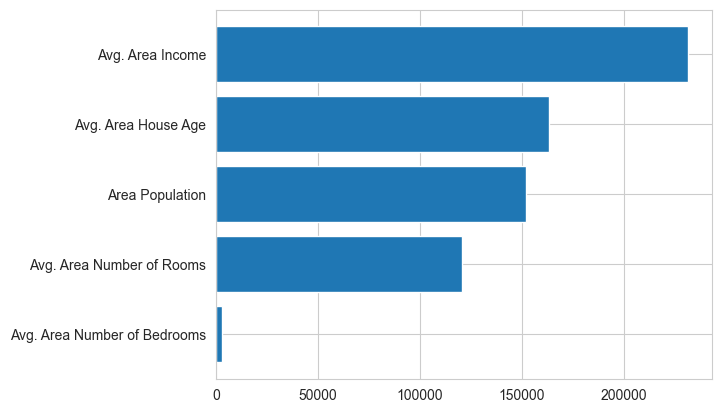

In [50]:
features = feat_coef.sort_values('importance_standarized')
plt.barh(features.index,features.importance_standarized)
plt.show()

Si lo comparamos con las correlaciones que obtuvimos en el EDA veras que hay una relación directa, pero no necesariamente "lineal". 

## Eliminar variables poco importantes

Para terminar, eliminemos las variables cuya importancia es mínima y veamos como afecta a las métricas del modelo (observa también que rápido es volver a crear un modelo y por lo tanto jugar con él)

In [51]:
USA_Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [52]:
X_train.drop(columns='Avg. Area Number of Bedrooms',inplace=True)
X_test.drop(columns='Avg. Area Number of Bedrooms',inplace=True)

lm2 = LinearRegression()
lm2.fit(X_train,y_train)

pred2 = lm2.predict(X_test)

print('MAE test', metrics.mean_absolute_error(y_test, pred2))
print('MSE test', metrics.mean_squared_error(y_test, pred2))
print('RMSE test', np.sqrt(metrics.mean_squared_error(y_test, pred2)))
print('R2 test', lm2.score(X_test,y_test))

MAE test 80857.78944046369
MSE test 10073721633.872656
RMSE test 100367.93130214777
R2 test 0.9181214278738083


No hay apenas diferencia y además ganamos en velocidad y simplificamos. En general, no siempre, querremos utilizar el menor número de features posible.

## Regularización

La regularización es el proceso de "penalizar" un modelo o utilizar un modelo más sencillo al que inicialmente habíamos apuntado con la intención de conseguir que generalice mejor (es decir que la diferencia entre error de train y test sea reduzca aunque ambos errores sean grandes). La regularización es un proceso que se aplica a cualquier modelo, pero en esta sesión vamos a verlo en modelos de regresión lineal.  
 
En concreto para ver el impacto de la regularización en modelos de regresión lineal vamos a crear un modelo de regresión lineal sin regularización y luego varios modelos en los que aplicaremos penalizaciones L2 y L1 (o regularizaciones L2 y L1) también basados en la regresión lineal (los que hemos llamado Ridge y Lasso)

### Problema y Datos

Consideramos un estudio médico realizado en 97 hombres con cáncer de próstata.
El enfoque se centra en la relación entre el antígeno prostático específico (psa), que se eleva en hombres con cáncer de próstata, y otras medidas clínicas.
Las otras medidas clínicas son las variables predictoras, recogidas en un examen médico, y la cantidad de expresión del antígeno asociado con la detección del cáncer es la variable de respuesta (lpsa).

Así, el marco de datos se compone de 97 observaciones sobre 9 variables:
* lcavol: logaritmo del volumen del cáncer
* lweight: logaritmo del peso de la próstata
* edad: edad del paciente en años
* lbph: logaritmo de la cantidad de hiperplasia prostática benigna
* svi: invasión de vesícula seminal
* lcp: logaritmo de la penetración capsular
* gleason: puntuación de Gleason
* pgg45: porcentaje de la puntuación de Gleason 4 o 5
* lpsa: logaritmo del antígeno prostático específico

**El objetivo es encontrar modelos que predigan la respuesta lpsa.**




In [2]:
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
import seaborn as sns

### Carga de datos y primera visulización

In [3]:
lpsa_data = pd.read_csv('data/prostate_dataset.txt', delimiter='\t')
lpsa_data = lpsa_data.loc[:, 'lcavol':]
lpsa_data.head()

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [4]:
lpsa_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   lcavol   97 non-null     float64
 1   lweight  97 non-null     float64
 2   age      97 non-null     int64  
 3   lbph     97 non-null     float64
 4   svi      97 non-null     int64  
 5   lcp      97 non-null     float64
 6   gleason  97 non-null     int64  
 7   pgg45    97 non-null     int64  
 8   lpsa     97 non-null     float64
dtypes: float64(5), int64(4)
memory usage: 6.9 KB


### Data train/test splitting

Podemos hacer un split como queramos, si suponemos que ya hay un orden aleatorio en los datos, podemos hacer una selección de las n primeras filas para train y las siguientes para test. Aunque se aconseja usar sklearn en general:

In [5]:
# train : the first rows 
# test : the last rows 
n_split = 60
train_set = lpsa_data.iloc[:n_split] # without pgg45
test_set = lpsa_data.iloc[n_split:]
target = "lpsa"
X_train = train_set.drop(target, axis = 1)
y_train = train_set[target]
X_test = test_set.drop(target, axis = 1)
y_test = test_set[target]

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60, 8)
(37, 8)
(60,)
(37,)


### EDA y seleccion de features

Tenemos un dataset numérico continuo (de pontenciales features numéricas continuas) y aunque deberíamos hacer un EDA un poco más exhaustivo, nos vamos a centrar en el análisis de correlaciones para la selección de features. Pero antes analicemos el target univariantemente. 

#### Target

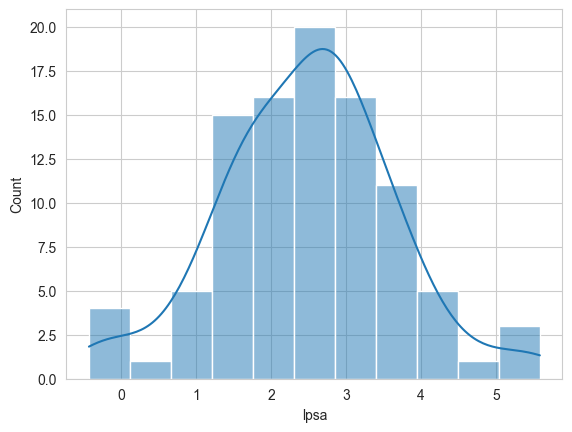

In [8]:
sns.histplot(lpsa_data["lpsa"], kde= True);

La variable target tiene una distribución casi normal, lo que es bueno para aplicar regresiones lineales.

Veamos las correlaciones:

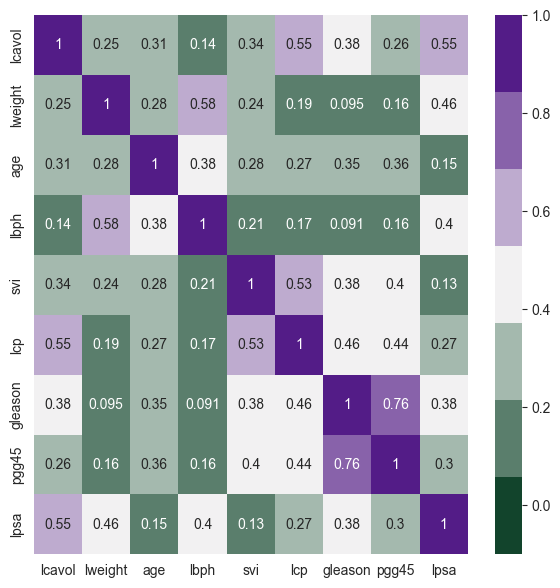

In [9]:

plt.figure(figsize=(7,7))
sns.heatmap(train_set.corr(),
           vmin=-0.1,
           vmax=1,
           cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
           annot=True);

* La variable más correlacionada con la respuesta lpsa es lcavol.
  Por lo tanto, en un análisis de datos, la variable lcavol debe incluirse como predictor.

* La matriz de correlación muestra que gleason y pgg45 están realmente correlacionados.
  De hecho, la variable pgg45 mide el porcentaje de puntuaciones de Gleason 4 o 5 que se registraron antes de la puntuación final actual de Gleason. Descartaremos pgg45 por esta relación. 

* Observa que hay otras correlaciones entre las posibles features que nos invitarían a hacer un pequeño análisis de colinearidad (svi-lcp, 0.68 de correlación, pej.), pero no tenemos hueco, aunque probablemente sería una mejora del modelo.

Vamos a mostrar  gráficamente la relación entre la respuesta lpsa y la característica lcavol.


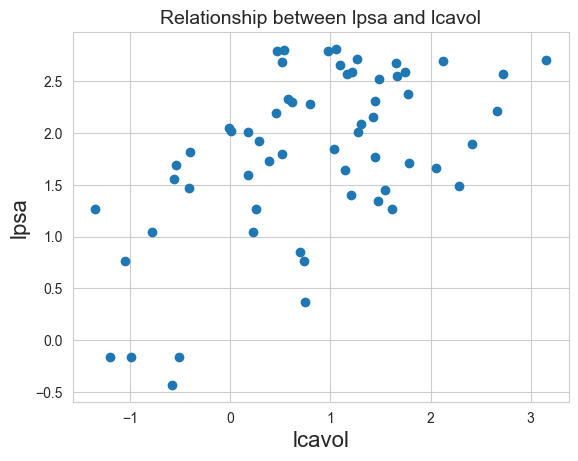

In [10]:
plt.scatter(train_set['lcavol'], train_set['lpsa'])
plt.xlabel('lcavol', fontsize=16)
plt.ylabel('lpsa', fontsize=16)
plt.title("Relationship between lpsa and lcavol", fontsize=14)
plt.show()

In [11]:
exclude = ["pgg45"]
X_train = X_train.drop(columns= exclude)
X_test = X_test.drop(columns = exclude)

### Modelados


### Baseline a partir de un regresor lineal



In [12]:
lr = linear_model.LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
#baseline_error = metrics.mean_squared_error(y_test, y_pred)

print("Train MSE:", metrics.mean_squared_error(y_train, lr.predict(X_train)))
print("Test MSE:", metrics.mean_squared_error(y_test, lr.predict(X_test)))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, lr.predict(X_test))))

Train MSE: 0.2877748864599949
Test MSE: 2.864149965701442


Fíjate que existe una gran diferencia entre el error de Test y el error de Train, eso nos dice que el modelo generaliza mal y que fallará bastante con datos nuevos. Es hora de ganar bias (tener un error mayor en general) al precio de reducir varianza (ganar generalización) y para ello aplicaremos la regularización.

### Aplicamos Regularización (particularizado para regresión lineal)

Para evitar el sobreajuste, empleamos la regularización, que básicamente es controlar la complejidad del modelo (o ponerle "trabas").
En las sesioines teóricas hemos visto mecanismos de regularización basados en incluir una penalización adicional a la función de error. Esta "penalización" se denomina término de regularización ($\lambda Reg(\beta)$). Y en general esta compuesta por dos partes:

* $Reg(\beta)$ que es una forma de penalizar (depende del método, y se usará si quiero limitar los coeficientes menos útiles, el rango de los mismos, etc) -> Depende del método de regularización.
* Y lambda que es el peso que le damos a la penalización (a mayor lambda más estamos "fastidiando" al modelo y más lo estamos regularizando)

Lambda ( o alpha en algunas versiones) es nuestro primer "hiperparámetros", recuerda esos valores que sí controlamos desde fuera del modelo (y que además en este caso vamos a poder aplicar a casi todos los modelos) y que nos ayudan a gestionar el entrenamiento. Los mejores valores de los hiperparámetros y no solo los de regularización, se buscan con diferentes técnicas que veremos cuando tratemos específicamente el "ajuste" o *tuning* de los modelos. Volviendo a la regularización que hemos visto en teoría:



### Regresión Ridge

En la regresión Ridge, el término de regularización es $Reg(\beta) = \sum_{j=0}^{j=p}\beta_j^2$. (recuerda que $\beta$ son los coeficientes o pesos de la regresión y p el número de coeficientes que hayamos incluido, tantos como numero de features más 1)  

La regresión Ridge permite reducir la magnitud de los pesos $\beta_i$ de la regresión lineal, y así evitar el sobreaprendizaje.  

La regresión Ridge tiene un efecto de selección agrupada: las variables correlacionadas tienen los mismos pesos.


In [14]:
from sklearn.linear_model import Ridge

ridgeR = Ridge(alpha = 10) # alpha es lambda 
ridgeR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE:", round(metrics.mean_squared_error(y_train, ridgeR.predict(X_train)),2))
print("Test MSE:", round(metrics.mean_squared_error(y_test, ridgeR.predict(X_test)),2))
# print("Test RMSE:", np.sqrt(metrics.mean_squared_error(y_test, ridgeR.predict(X_test))))

Train MSE sin regularización: 0.29
Test MSE sin regularización: 2.86
Train MSE: 0.32
Test MSE: 2.07


### Regresión LASSO (Least Absolute Shrinkage and Selection Operator)

El Lasso realiza una selección de características del modelo: para variables correlacionadas, retiene solo una variable y establece otras variables correlacionadas en cero.
La contraparte es que obviamente induce una pérdida de información que resulta en menor precisión.

En Lasso, el término de regularización se define por $Reg(\beta) = \sum_{j=0}^{j=p}|\beta_j|$. Al igual que Ridge, tiene un peso para ese término (alpha o lambda).


In [15]:
from sklearn.linear_model import Lasso

lassoR = Lasso(alpha=0.1)
lassoR.fit(X_train, y_train)

print("Train MSE sin regularización:", round(metrics.mean_squared_error(y_train, lr.predict(X_train)),2))
print("Test MSE sin regularización:", round(metrics.mean_squared_error(y_test, lr.predict(X_test)),2))

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE sin regularización: 0.29
Test MSE sin regularización: 2.86
Train MSE: 0.3740
Test MSE: 2.0788


In [16]:
lassoR = Lasso(alpha = 0.02) 
lassoR.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, lassoR.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, lassoR.predict(X_test)))

Train MSE: 0.3061
Test MSE: 1.8514


### Regresion Elastic net

El método Elastic Net es un híbrido de la regresión Ridge y el Lasso.
El término de regularización combina tanto las regularizaciones $L_1$ (Lasso) como $L_2$ (Ridge).

Más precisamente, el término de regularización se establece en $Reg(\beta) = \lambda((l1_{ratio})||\beta||_1+(1-l1_{ratio})||\beta||_2^2)$ donde $l1_{ratio}$ es un hiperparámetro adicional a ajustar.

El Elastic Net tiene un efecto de selección sobre las variables como el Lasso, pero mantiene variables correlacionadas como la regresión Ridge.
Por lo tanto, el modelo Elastic Net es menos disperso que el Lasso, conservando más información.
Sin embargo, el modelo demanda más recursos computacionales.



In [17]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.5, l1_ratio = 0.5)
elastic_net.fit(X_train, y_train)

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 0.4842
Test MSE: 2.8103


In [18]:
elastic_net = ElasticNet(alpha = 0.02, l1_ratio=1)
elastic_net.fit(X_train, y_train) 

print("Train MSE: %0.4f" % metrics.mean_squared_error(y_train, elastic_net.predict(X_train)))
print("Test MSE: %0.4f" % metrics.mean_squared_error(y_test, elastic_net.predict(X_test)))

Train MSE: 0.3061
Test MSE: 1.8514


En este caso, sin tunear exahustivamente los hiperparámetros, parece interesante aplicar una Ridge Regression, o una Regularización Ridge a la regresión lineal.

### RESUMEN IMPORTANTE:  

¿Y sólo hay estos métodos para la regresión lineal?

No, se pueden aplicar penalizaciones L2 y L1 a todas las funciones de pérdidas y veremos que los modelos tienen sus hiperparámetros relacionados para poder "castigar"/"regularizar" con las mismas ideas que Ridge y Lasso (limitar el valor de los coeficientes o parámetros, quitar coeficientes correlados). Eso sí, como no todos los modelos tienen "pesos", no siempre será igual...

Entonces, ¿qué lío?¿Con qué me quedo? Con lo siguiente:
* Todos los modelos tienen hiperparametros (argumentos que nosotros podemos controlar, aka dar el valor que queramos) que sirven para regularizarlos más o menos y controlar el overfitting. Aprenderemos de cada modelo cuáles son.
* El mejor valor de estos hiperparámetros dependerá del nivel de generalización que queramos frente al error (bias) particular en cada predicción. Y aprenderemos a ajustarlos una vez tengamos nuestro modelo ganador.
* Tres tipos de regularización son la Ridge, la Lasso y la combinación (Elastic Net)
* La regularización no sólo es "fastidiar" la función de pérdida, es simplificar el modelo (quitar features, por ejemplo, limitar los valores, usar modelos que internamente son más sencillos, etc)